In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df= pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df[:5]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# assest data

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [42]:
df.duplicated().sum()

0

In [304]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [305]:
df.describe().round()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.0,110527.0,110527.0,110527.0,110527.0,110527.0,110527.0,110527.0
mean,1.474963e+14,5675305.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.560949e+14,71296.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.921800e+04,5030230.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.172614e+12,5640286.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.173184e+13,5680573.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,9.439172e+13,5725524.0,55.0,0.0,0.0,0.0,0.0,0.0,1.0
max,9.999816e+14,5790484.0,115.0,1.0,1.0,1.0,1.0,4.0,1.0


# clean data

In [306]:
df.drop(index=99832, inplace= True)
#df=df[df.Age>=0]



In [307]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [308]:
#remove all above 100 years
df=df[df.Age<=100]

In [309]:
df.describe().round()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105190e+05,110519.0,110519.0,110519.0,110519.0,110519.0,110519.0,110519.0,110519.0
mean,1.474860e+14,5675303.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.560826e+14,71296.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.921800e+04,5030230.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.172457e+12,5640284.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,3.172598e+13,5680569.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,9.438963e+13,5725522.0,55.0,0.0,0.0,0.0,0.0,0.0,1.0
max,9.999816e+14,5790484.0,100.0,1.0,1.0,1.0,1.0,4.0,1.0


In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110519 non-null  float64
 1   AppointmentID   110519 non-null  int64  
 2   Gender          110519 non-null  object 
 3   ScheduledDay    110519 non-null  object 
 4   AppointmentDay  110519 non-null  object 
 5   Age             110519 non-null  int64  
 6   Neighbourhood   110519 non-null  object 
 7   Scholarship     110519 non-null  int64  
 8   Hipertension    110519 non-null  int64  
 9   Diabetes        110519 non-null  int64  
 10  Alcoholism      110519 non-null  int64  
 11  Handcap         110519 non-null  int64  
 12  SMS_received    110519 non-null  int64  
 13  No-show         110519 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [52]:
df.duplicated().sum()

0

In [311]:
df.corr().round()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0
AppointmentID,0.0,1.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0
Age,-0.0,-0.0,1.0,-0.0,1.0,0.0,0.0,0.0,0.0
Scholarship,-0.0,0.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0,0.0
Hipertension,-0.0,0.0,1.0,-0.0,1.0,0.0,0.0,0.0,-0.0
Diabetes,0.0,0.0,0.0,-0.0,0.0,1.0,0.0,0.0,-0.0
Alcoholism,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.0
Handcap,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,1.0,-0.0
SMS_received,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,1.0


In [5]:
df.rename({"No-show":"No_show"},inplace=True,axis=1)


In [313]:
df.duplicated("PatientId").sum()

48225

In [314]:
df.duplicated(["PatientId","No_show"]).sum()

38708

In [315]:
df.drop_duplicates(["PatientId","No_show"], inplace=True)

In [316]:
df.shape

(71811, 14)

# exploratry data 

In [317]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


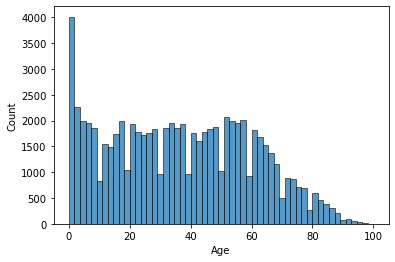

In [318]:
sns.histplot(df.Age,);

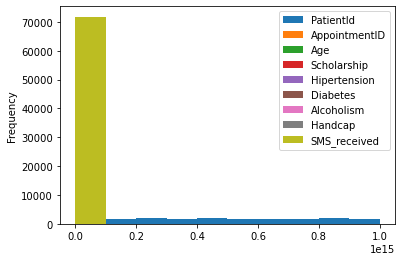

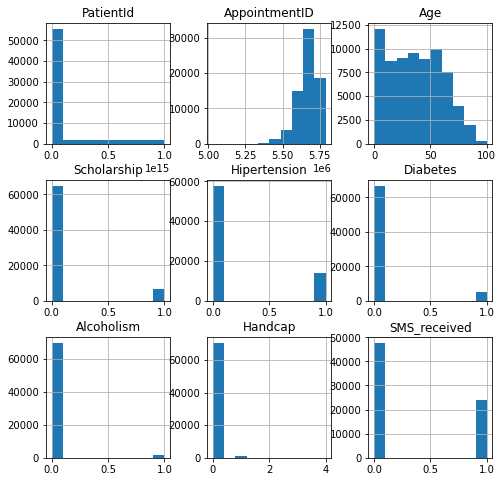

In [319]:
df.plot(kind= "hist");
df.hist(figsize=(8,8));i


In [320]:
df.ScheduledDay=pd.to_datetime(df.ScheduledDay)
df.AppointmentDay=pd.to_datetime(df.AppointmentDay)

In [321]:
#working on this correlacion
df.drop(['ScheduledDay','AppointmentDay',"PatientId","AppointmentID"],axis=1,inplace=True)

In [322]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# is Gender effect visit ?

In [323]:
df.Gender.value_counts()

F    46461
M    25350
Name: Gender, dtype: int64

In [324]:
df.No_show.value_counts()

No     54149
Yes    17662
Name: No_show, dtype: int64

In [325]:
df.groupby('Gender')["No_show"].value_counts()

Gender  No_show
F       No         34956
        Yes        11505
M       No         19193
        Yes         6157
Name: No_show, dtype: int64

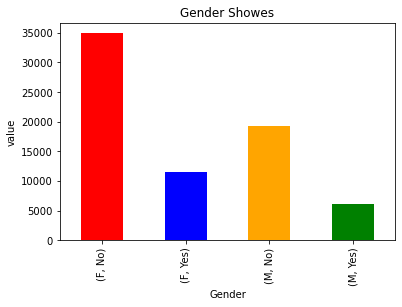

In [326]:
df.groupby('Gender')["No_show"].value_counts().plot(kind="bar",title='Gender Showes',color=["red","blue","orange","green"]);
plt.xlabel("Gender");
plt.ylabel("value");

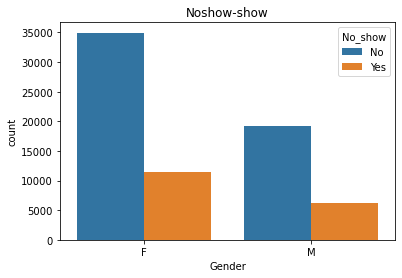

In [328]:
a=sns.countplot(x="Gender",hue="No_show",data= df);
a.set_title("Noshow-show");
#deffr photo

We can see that of the 88,000 patients that appeared, about 57,000 were female and 31,000 were male. Of the 22,500 patients who did not come for a visit, about 15,000 were females and 7,500 were males The ratio of females to males who attended appears to be the same as that which did not come to visit, and therefore gender does not affect

for femal 26%

for male 24%

In [329]:
df[df.Gender=="F"]["No_show"].value_counts()

No     34956
Yes    11505
Name: No_show, dtype: int64

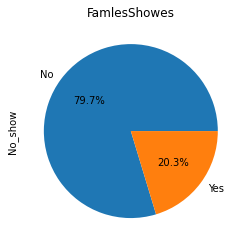

In [6]:
df[df.Gender=="F"]["No_show"].value_counts().plot(kind="pie",title='FamlesShowes',autopct='%1.1f%%');

In [147]:
df[df.Gender=="M"]["No_show"].value_counts()

No     30962
Yes     7725
Name: No_show, dtype: int64

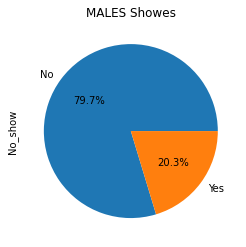

In [7]:
df[df.Gender=="F"]["No_show"].value_counts().plot(kind="pie",title='MALES Showes',autopct='%1.1f%%');

# does the age effect ?

In [200]:
df.groupby("No_show")["Age"].mean()

No_show
No     37.790504
Yes    34.317667
Name: Age, dtype: float64

In [209]:
df.groupby("No_show")["Age"].value_counts()

No_show  Age
No       0      2900
         1      1858
         52     1449
         56     1372
         2      1366
                ... 
Yes      94        6
         95        6
         97        2
         96        1
         98        1
Name: Age, Length: 200, dtype: int64

In [212]:
df.groupby("No_show")["Age"].value_counts()

No_show  Age
No       0      2900
         1      1858
         52     1449
         56     1372
         2      1366
                ... 
Yes      94        6
         95        6
         97        2
         96        1
         98        1
Name: Age, Length: 200, dtype: int64

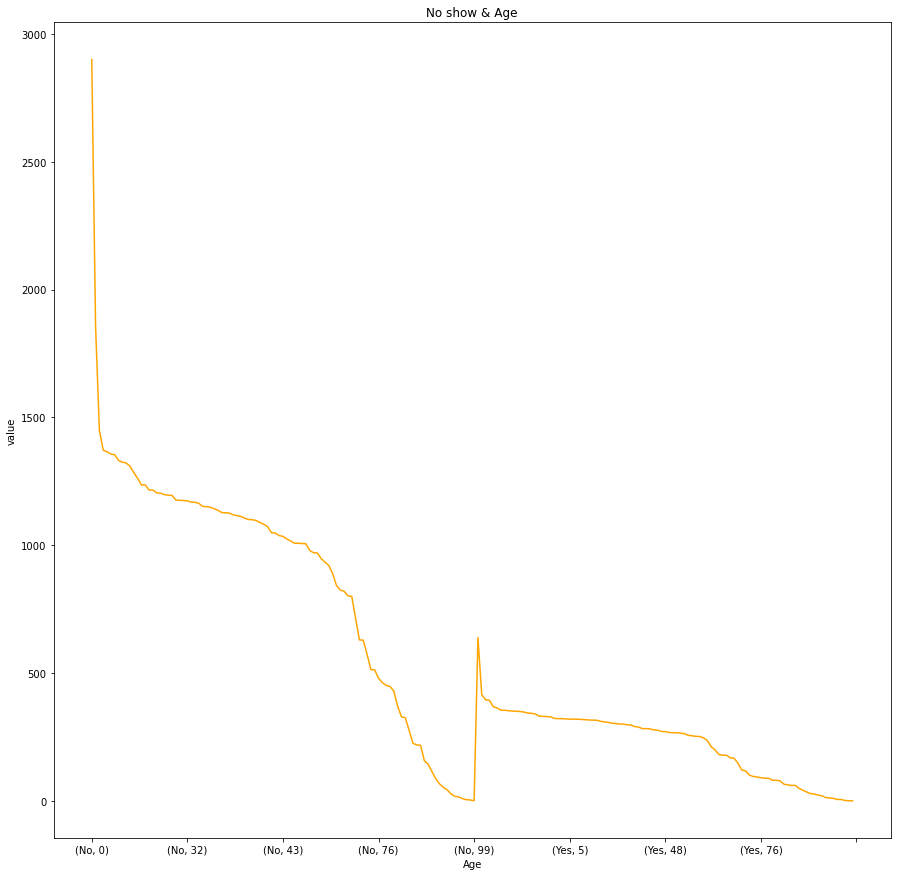

In [247]:
df.groupby("No_show")["Age"].value_counts().plot(kind="line",figsize=(15,15),title="No show & Age",color=["orange"]);
plt.xlabel("Age");
plt.ylabel("value");


Text(0.5, 1.0, 'comparison of Attendance by Age')

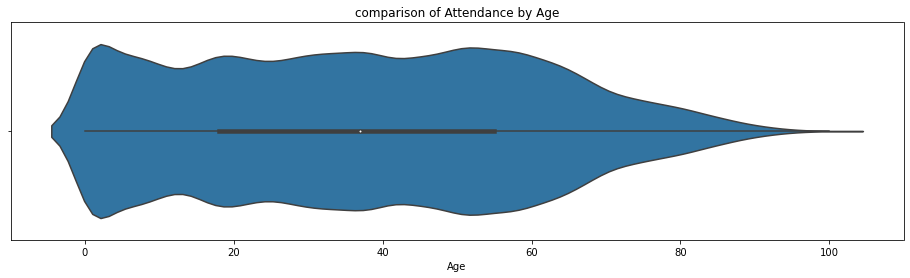

In [242]:
plt.figure(figsize=(16,4))
ax= sns.violinplot(x="Age", hue="No_show",data=df)
ax.set_title("comparison of Attendance by Age")


# Does Neighbourhood affect on the attendance?

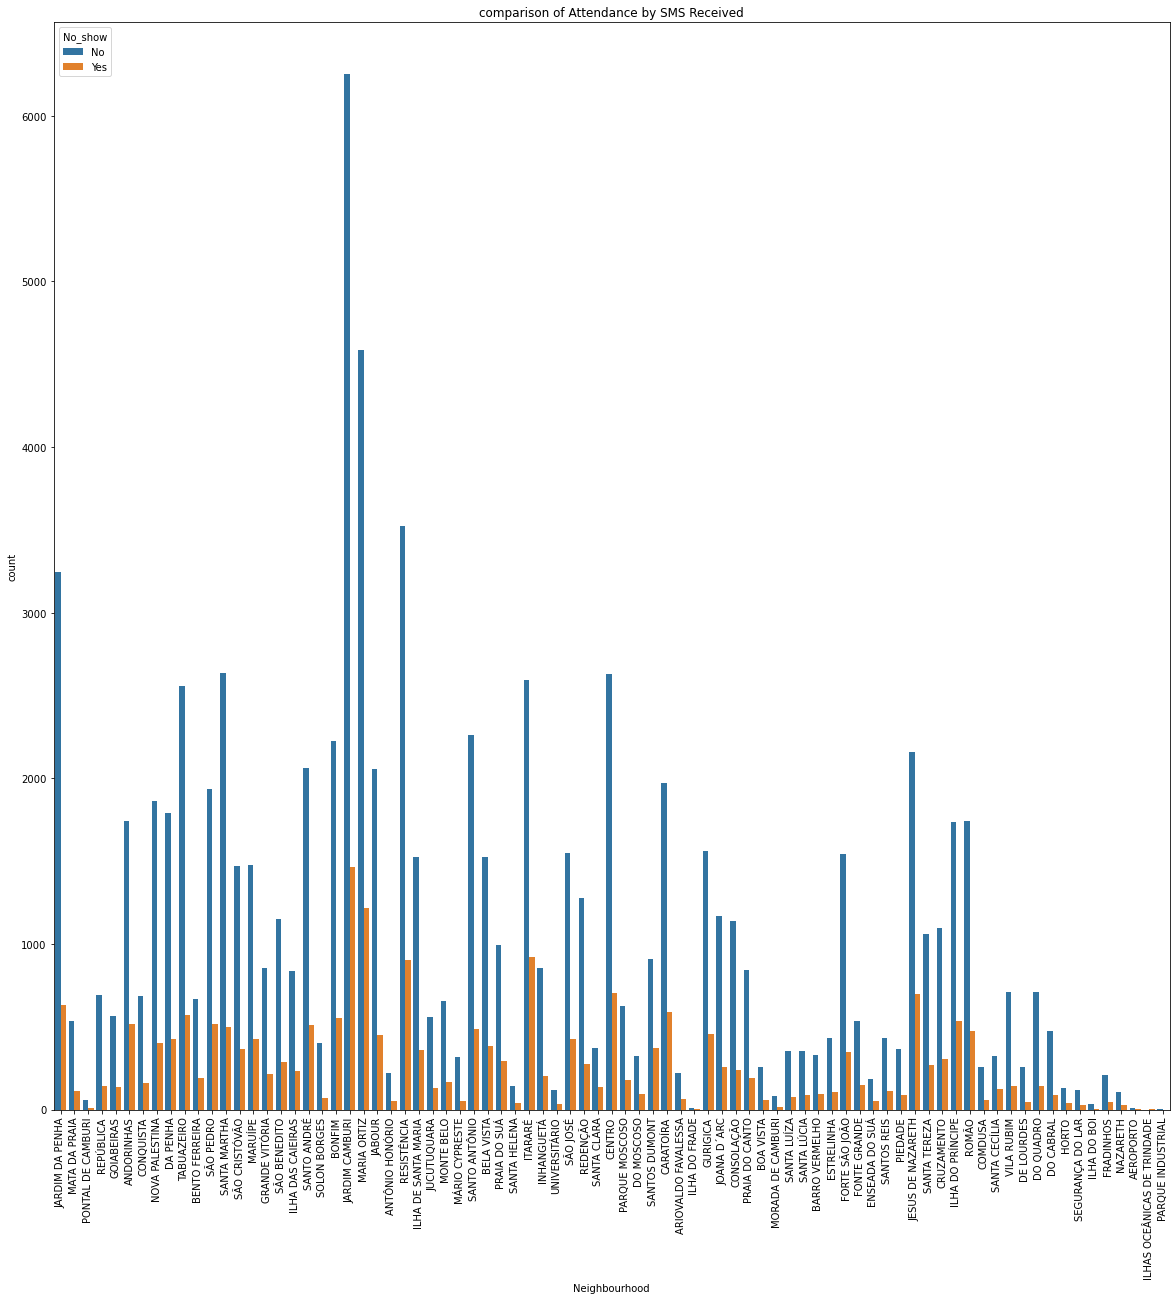

In [249]:
plt.figure(figsize=(20,20))
xx=sns.countplot(x="Neighbourhood",hue="No_show",data= df);
plt.xticks(rotation=90);
xx.set_title("comparison of Attendance by SMS Received");

JARDIM CAMBURI has a greatest num. of pateints and also has a greatest
showing rate.


# what is the relation between sms and showing ?

In [250]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [263]:
#that is show the deffrint between people who came and the people who did not come after receving sms 
df[df.SMS_received==1]["No_show"].value_counts()

No     25697
Yes     9784
Name: No_show, dtype: int64

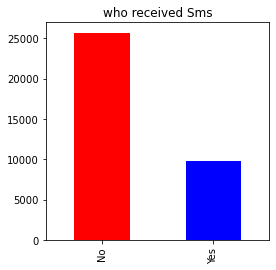

In [9]:
df[df.SMS_received==1]["No_show"].value_counts().plot(kind= "bar",title="who received Sms",color=["red","blue"],figsize=(4,4));

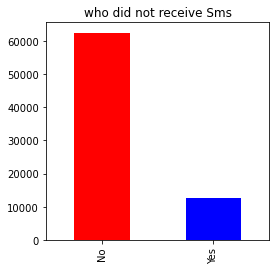

In [284]:
#that is show the deffrint between people who came and the people who did not come after did not recev sms 
df[df.SMS_received==0]["No_show"].value_counts().plot(kind= "bar",title="who did not receive Sms",color=["red","blue"],figsize=(4,4));

In [262]:
df.groupby(df.SMS_received)["No_show"].value_counts()

SMS_received  No_show
0             No         62506
              Yes        12532
1             No         25697
              Yes         9784
Name: No_show, dtype: int64

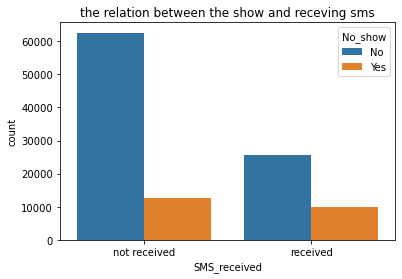

In [289]:
s=sns.countplot(x="SMS_received",hue="No_show", data=df);
s.set_title("the relation between the show and receving sms")
plt.xticks([0, 1], ["not received","received"]);


from this we notced that there a problem with sms 